In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
d = pd.read_csv("heart.csv")
d

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
x = d.drop("HeartDisease", axis=1)
y = d["HeartDisease"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
279,54,F,ATA,130,253,0,ST,155,N,0.0,Up
451,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat
557,56,M,NAP,137,208,1,ST,122,Y,1.8,Flat
548,66,M,ASY,112,261,0,Normal,140,N,1.5,Up
...,...,...,...,...,...,...,...,...,...,...,...
835,54,M,ASY,110,239,0,Normal,126,Y,2.8,Flat
192,48,M,ATA,130,245,0,Normal,160,N,0.0,Up
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down


In [8]:
x_train.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [9]:
x_train["Sex"] = (x_train["Sex"] == "F").astype("int8")
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
279,54,1,ATA,130,253,0,ST,155,N,0.0,Up
451,64,0,ASY,144,0,0,ST,122,Y,1.0,Flat
39,48,1,ASY,150,227,0,Normal,130,Y,1.0,Flat
557,56,0,NAP,137,208,1,ST,122,Y,1.8,Flat
548,66,0,ASY,112,261,0,Normal,140,N,1.5,Up
...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,ASY,110,239,0,Normal,126,Y,2.8,Flat
192,48,0,ATA,130,245,0,Normal,160,N,0.0,Up
629,57,1,ASY,128,303,0,LVH,159,N,0.0,Up
559,64,0,ASY,134,273,0,Normal,102,Y,4.0,Down


In [10]:
dict1 = {}
dict1["ChestPainType"] = x_train["ChestPainType"].value_counts()

In [11]:
x_train = pd.get_dummies(x_train, columns = ["ChestPainType"], dtype = "int8")


In [12]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
279,54,1,130,253,0,ST,155,N,0.0,Up,0,1,0,0
451,64,0,144,0,0,ST,122,Y,1.0,Flat,1,0,0,0
39,48,1,150,227,0,Normal,130,Y,1.0,Flat,1,0,0,0
557,56,0,137,208,1,ST,122,Y,1.8,Flat,0,0,1,0
548,66,0,112,261,0,Normal,140,N,1.5,Up,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,110,239,0,Normal,126,Y,2.8,Flat,1,0,0,0
192,48,0,130,245,0,Normal,160,N,0.0,Up,0,1,0,0
629,57,1,128,303,0,LVH,159,N,0.0,Up,1,0,0,0
559,64,0,134,273,0,Normal,102,Y,4.0,Down,1,0,0,0


In [13]:
x_train["RestingECG"].value_counts()

RestingECG
Normal    415
ST        138
LVH       135
Name: count, dtype: int64

In [14]:
dict1["RestingECG"] = x_train["RestingECG"].value_counts() 
x_train = pd.get_dummies(x_train, columns = ["RestingECG"], dtype = "int8")

In [15]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
279,54,1,130,253,0,155,N,0.0,Up,0,1,0,0,0,0,1
451,64,0,144,0,0,122,Y,1.0,Flat,1,0,0,0,0,0,1
39,48,1,150,227,0,130,Y,1.0,Flat,1,0,0,0,0,1,0
557,56,0,137,208,1,122,Y,1.8,Flat,0,0,1,0,0,0,1
548,66,0,112,261,0,140,N,1.5,Up,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,110,239,0,126,Y,2.8,Flat,1,0,0,0,0,1,0
192,48,0,130,245,0,160,N,0.0,Up,0,1,0,0,0,1,0
629,57,1,128,303,0,159,N,0.0,Up,1,0,0,0,1,0,0
559,64,0,134,273,0,102,Y,4.0,Down,1,0,0,0,0,1,0


In [16]:
x_train["ExerciseAngina"] = (x_train["ExerciseAngina"] == "Y").astype("int8")
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
279,54,1,130,253,0,155,0,0.0,Up,0,1,0,0,0,0,1
451,64,0,144,0,0,122,1,1.0,Flat,1,0,0,0,0,0,1
39,48,1,150,227,0,130,1,1.0,Flat,1,0,0,0,0,1,0
557,56,0,137,208,1,122,1,1.8,Flat,0,0,1,0,0,0,1
548,66,0,112,261,0,140,0,1.5,Up,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,110,239,0,126,1,2.8,Flat,1,0,0,0,0,1,0
192,48,0,130,245,0,160,0,0.0,Up,0,1,0,0,0,1,0
629,57,1,128,303,0,159,0,0.0,Up,1,0,0,0,1,0,0
559,64,0,134,273,0,102,1,4.0,Down,1,0,0,0,0,1,0


In [17]:
x_train["ST_Slope"].value_counts()

ST_Slope
Flat    336
Up      302
Down     50
Name: count, dtype: int64

In [18]:
dict1["ST_Slope"] = x_train["ST_Slope"].value_counts() 
x_train = pd.get_dummies(x_train, columns = ["ST_Slope"], dtype = "int8")

In [19]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
279,54,1,130,253,0,155,0,0.0,0,1,0,0,0,0,1,0,0,1
451,64,0,144,0,0,122,1,1.0,1,0,0,0,0,0,1,0,1,0
39,48,1,150,227,0,130,1,1.0,1,0,0,0,0,1,0,0,1,0
557,56,0,137,208,1,122,1,1.8,0,0,1,0,0,0,1,0,1,0
548,66,0,112,261,0,140,0,1.5,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,110,239,0,126,1,2.8,1,0,0,0,0,1,0,0,1,0
192,48,0,130,245,0,160,0,0.0,0,1,0,0,0,1,0,0,0,1
629,57,1,128,303,0,159,0,0.0,1,0,0,0,1,0,0,0,0,1
559,64,0,134,273,0,102,1,4.0,1,0,0,0,0,1,0,1,0,0


In [20]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
306,55,M,ASY,115,0,1,Normal,155,N,0.1,Flat
711,66,M,ASY,120,302,0,LVH,151,N,0.4,Flat
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat
466,55,M,NAP,120,0,0,ST,125,Y,2.5,Flat
253,62,M,ATA,140,271,0,Normal,152,N,1.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down
172,53,M,ATA,140,320,0,Normal,162,N,0.0,Up
479,56,M,NAP,170,0,0,LVH,123,Y,2.5,Flat
330,60,M,NAP,115,0,1,Normal,143,N,2.4,Up


In [21]:
x_test.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [22]:
x_test["Sex"] = (x_test["Sex"] == "F").astype("int8")
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
306,55,0,ASY,115,0,1,Normal,155,N,0.1,Flat
711,66,0,ASY,120,302,0,LVH,151,N,0.4,Flat
298,51,0,ASY,110,0,1,Normal,92,N,0.0,Flat
466,55,0,NAP,120,0,0,ST,125,Y,2.5,Flat
253,62,0,ATA,140,271,0,Normal,152,N,1.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
352,56,0,ASY,120,0,0,ST,100,Y,-1.0,Down
172,53,0,ATA,140,320,0,Normal,162,N,0.0,Up
479,56,0,NAP,170,0,0,LVH,123,Y,2.5,Flat
330,60,0,NAP,115,0,1,Normal,143,N,2.4,Up


In [23]:
x_test["ChestPainType"].value_counts()

ChestPainType
ASY    133
NAP     52
ATA     33
TA      12
Name: count, dtype: int64

In [24]:
dict1["ChestPainType"]

ChestPainType
ASY    363
NAP    151
ATA    140
TA      34
Name: count, dtype: int64

In [25]:
for i in sorted(dict1["ChestPainType"].keys()):
    x_test[f"ChestPainType_{i}"] = (x_test["ChestPainType"] == i).astype("int8")
x_test = x_test.drop("ChestPainType", axis = 1)

In [26]:
x_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
306,55,0,115,0,1,Normal,155,N,0.1,Flat,1,0,0,0
711,66,0,120,302,0,LVH,151,N,0.4,Flat,1,0,0,0
298,51,0,110,0,1,Normal,92,N,0.0,Flat,1,0,0,0
466,55,0,120,0,0,ST,125,Y,2.5,Flat,0,0,1,0
253,62,0,140,271,0,Normal,152,N,1.0,Up,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,56,0,120,0,0,ST,100,Y,-1.0,Down,1,0,0,0
172,53,0,140,320,0,Normal,162,N,0.0,Up,0,1,0,0
479,56,0,170,0,0,LVH,123,Y,2.5,Flat,0,0,1,0
330,60,0,115,0,1,Normal,143,N,2.4,Up,0,0,1,0


In [27]:
for i in sorted(dict1["RestingECG"].keys()):
    x_test[f"RestingECG_{i}"] = (x_test["RestingECG"] == i).astype("int8")
x_test = x_test.drop("RestingECG", axis = 1)

In [28]:
x_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
306,55,0,115,0,1,155,N,0.1,Flat,1,0,0,0,0,1,0
711,66,0,120,302,0,151,N,0.4,Flat,1,0,0,0,1,0,0
298,51,0,110,0,1,92,N,0.0,Flat,1,0,0,0,0,1,0
466,55,0,120,0,0,125,Y,2.5,Flat,0,0,1,0,0,0,1
253,62,0,140,271,0,152,N,1.0,Up,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,56,0,120,0,0,100,Y,-1.0,Down,1,0,0,0,0,0,1
172,53,0,140,320,0,162,N,0.0,Up,0,1,0,0,0,1,0
479,56,0,170,0,0,123,Y,2.5,Flat,0,0,1,0,1,0,0
330,60,0,115,0,1,143,N,2.4,Up,0,0,1,0,0,1,0


In [29]:
for i in sorted(dict1["ST_Slope"].keys()):
    x_test[f"ST_Slope_{i}"] = (x_test["ST_Slope"] == i).astype("int8")
x_test = x_test.drop("ST_Slope", axis = 1)

In [30]:
x_test["ExerciseAngina"] = (x_test["ExerciseAngina"] == "Y").astype("int8")
x_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
306,55,0,115,0,1,155,0,0.1,1,0,0,0,0,1,0,0,1,0
711,66,0,120,302,0,151,0,0.4,1,0,0,0,1,0,0,0,1,0
298,51,0,110,0,1,92,0,0.0,1,0,0,0,0,1,0,0,1,0
466,55,0,120,0,0,125,1,2.5,0,0,1,0,0,0,1,0,1,0
253,62,0,140,271,0,152,0,1.0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,56,0,120,0,0,100,1,-1.0,1,0,0,0,0,0,1,1,0,0
172,53,0,140,320,0,162,0,0.0,0,1,0,0,0,1,0,0,0,1
479,56,0,170,0,0,123,1,2.5,0,0,1,0,1,0,0,0,1,0
330,60,0,115,0,1,143,0,2.4,0,0,1,0,0,1,0,0,0,1


In [31]:
x_train.columns == x_test.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [32]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
279,54,1,130,253,0,155,0,0.0,0,1,0,0,0,0,1,0,0,1
451,64,0,144,0,0,122,1,1.0,1,0,0,0,0,0,1,0,1,0
39,48,1,150,227,0,130,1,1.0,1,0,0,0,0,1,0,0,1,0
557,56,0,137,208,1,122,1,1.8,0,0,1,0,0,0,1,0,1,0
548,66,0,112,261,0,140,0,1.5,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,0,110,239,0,126,1,2.8,1,0,0,0,0,1,0,0,1,0
192,48,0,130,245,0,160,0,0.0,0,1,0,0,0,1,0,0,0,1
629,57,1,128,303,0,159,0,0.0,1,0,0,0,1,0,0,0,0,1
559,64,0,134,273,0,102,1,4.0,1,0,0,0,0,1,0,1,0,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'Oldpeak'}>, <Axes: >]], dtype=object)

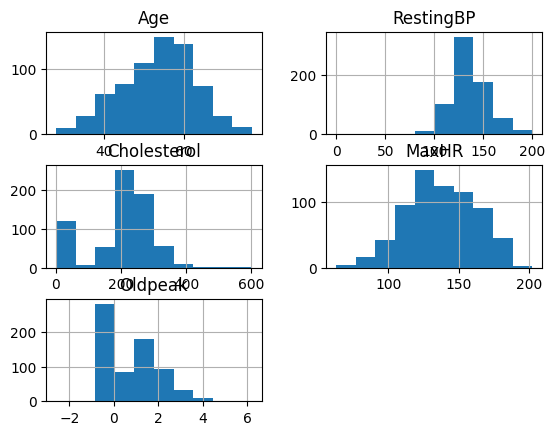

In [33]:
x_train[["Age",	"RestingBP","Cholesterol",	"MaxHR", "Oldpeak"]].hist()

In [34]:
x_train_sc = x_train[["Age",	"RestingBP","Cholesterol",	"MaxHR", "Oldpeak"]]

In [35]:
scl = StandardScaler()
x_train_sc = pd.DataFrame(scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)

In [36]:
x_train[["Age",	"RestingBP","Cholesterol",	"MaxHR", "Oldpeak"]] = x_train_sc

In [37]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
279,0.048546,1,-0.130838,0.492193,0,0.704040,0,-0.839821,0,1,0,0,0,0,1,0,0,1
451,1.112227,0,0.618853,-1.896574,0,-0.602633,1,0.112068,1,0,0,0,0,0,1,0,1,0
39,-0.589663,1,0.940149,0.246707,0,-0.285864,1,0.112068,1,0,0,0,0,1,0,0,1,0
557,0.261282,0,0.244007,0.067314,1,-0.602633,1,0.873580,0,0,1,0,0,0,1,0,1,0
548,1.324963,0,-1.094726,0.567728,0,0.110098,0,0.588013,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.048546,0,-1.201824,0.360009,0,-0.444248,1,1.825469,1,0,0,0,0,1,0,0,1,0
192,-0.589663,0,-0.130838,0.416659,0,0.902021,0,-0.839821,0,1,0,0,0,1,0,0,0,1
629,0.367650,1,-0.237936,0.964282,0,0.862425,0,-0.839821,1,0,0,0,1,0,0,0,0,1
559,1.112227,0,0.083359,0.681029,0,-1.394556,1,2.967736,1,0,0,0,0,1,0,1,0,0


In [38]:
x_test_sc = x_test[["Age",	"RestingBP","Cholesterol",	"MaxHR", "Oldpeak"]]
x_test_sc = pd.DataFrame(scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["Age",	"RestingBP","Cholesterol",	"MaxHR", "Oldpeak"]] = x_test_sc

In [39]:
x_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
306,0.154914,0,-0.934078,-1.896574,1,0.704040,0,-0.744632,1,0,0,0,0,1,0,0,1,0
711,1.324963,0,-0.666331,0.954840,0,0.545656,0,-0.459065,1,0,0,0,1,0,0,0,1,0
298,-0.270558,0,-1.201824,-1.896574,1,-1.790518,0,-0.839821,1,0,0,0,0,1,0,0,1,0
466,0.154914,0,-0.666331,-1.896574,0,-0.483844,1,1.539902,0,0,1,0,0,0,1,0,1,0
253,0.899491,0,0.404655,0.662145,0,0.585252,0,0.112068,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.261282,0,-0.666331,-1.896574,0,-1.473748,1,-1.791710,1,0,0,0,0,0,1,1,0,0
172,-0.057822,0,0.404655,1.124792,0,0.981214,0,-0.839821,0,1,0,0,0,1,0,0,0,1
479,0.261282,0,2.011135,-1.896574,0,-0.563037,1,1.539902,0,0,1,0,1,0,0,0,1,0
330,0.686754,0,-0.934078,-1.896574,1,0.228887,0,1.444713,0,0,1,0,0,1,0,0,0,1


In [40]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_score(y_train, model1.predict(x_train)), accuracy_score(y_test, model1.predict(x_test))


(0.8793604651162791, 0.8217391304347826)

In [41]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
accuracy_score(y_train, model2.predict(x_train)), accuracy_score(y_test, model2.predict(x_test))

(0.8633720930232558, 0.8304347826086956)

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(x_train, y_train)
accuracy_score(y_train, model3.predict(x_train)), accuracy_score(y_test, model3.predict(x_test))

In [ ]:
p = model3.predict(x_test)
t = y_test.values

t, p

In [ ]:
tp, tn, fp, fn = 0, 0, 0, 0
for true, pred in zip(t, p):
    if true == pred == 1:
        tp += 1
    elif true == pred == 0:
        tn += 1
    elif true == 1 and pred == 0:
        fn += 1
    else:
        fp += 1
        
tp, tn, fp, fn

In [ ]:
confusion_matrix(t, p)

In [ ]:
pr = tp / (tp + fp)
rec = tp / (tp + fn)
f1 = 2 * pr * rec/(pr + rec)
f1

In [ ]:
f1_score(t, p)

In [ ]:
print(classification_report(t, p))

In [ ]:
data =pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
data['gender'] = (data['gender'] == 'Male').astype('int8')

In [ ]:
data

In [ ]:
data['gender'].value_counts()

In [ ]:
data['smoking_history'].value_counts()

In [ ]:
never = 19583
former = 5218
current = int((35816*((9286/(64184 / 100))/100) // 1) + 1)
not_current = int((35816*((6447/(64184 / 100))/100) // 1) + 1)
ever = int((35816*((4004/(64184 / 100))/100) // 1) + 1)
for i in range(len(data['smoking_history'])):
    if data['smoking_history'][i] == 'No Info':
        if never > 0:
            data['smoking_history'][i] = 'never'
            never -= 1
        if former > 0:
            data['smoking_history'][i] = 'former'
            former -= 1
        if current > 0:
            data['smoking_history'][i] = 'current'
            current -= 1
        if not_current > 0:
            data['smoking_history'][i] = 'not_current'
            not_current -= 1
        if ever > 0:
            data['smoking_history'][i] = 'ever'
            ever -= 1

In [ ]:
data

In [ ]:
data = pd.get_dummies(data, columns = ["smoking_history"], dtype = "int8")

In [ ]:
data

In [ ]:
x = data.drop('diabetes', axis = 1)
y = data['diabetes']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train.hist()

In [ ]:
data

In [ ]:
x_train_sc = x_train[['age','hypertension','bmi', 'HbA1c_level', 'blood_glucose_level']]

In [ ]:
scl = StandardScaler()
x_train_sc = pd.DataFrame(scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[['age','hypertension','bmi', 'HbA1c_level', 'blood_glucose_level']] = x_train_sc

In [ ]:
x_train_sc.hist()

In [ ]:
x_test_sc = x_test[['age','hypertension','bmi', 'HbA1c_level', 'blood_glucose_level']]
x_test_sc = pd.DataFrame(scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[['age','hypertension','bmi', 'HbA1c_level', 'blood_glucose_level']] = x_test_sc

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_score(y_train, model1.predict(x_train)), accuracy_score(y_test, model1.predict(x_test))

In [ ]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
accuracy_score(y_train, model2.predict(x_train)), accuracy_score(y_test, model2.predict(x_test))

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(x_train, y_train)
accuracy_score(y_train, model3.predict(x_train)), accuracy_score(y_test, model3.predict(x_test))

In [ ]:
p = model3.predict(x_test)
t = y_test.values

t, p

In [ ]:
tp, tn, fp, fn = 0, 0, 0, 0
for true, pred in zip(t, p):
    if true == pred == 1:
        tp += 1
    elif true == pred == 0:
        tn += 1
    elif true == 1 and pred == 0:
        fn += 1
    else:
        fp += 1
        
tp, tn, fp, fn

In [ ]:
confusion_matrix(t, p)

In [ ]:
pr = tp / (tp + fp)
rec = tp / (tp + fn)
f1 = 2 * pr * rec/(pr + rec)
f1

In [ ]:
f1_score(t, p)

In [ ]:
smote = SMOTE(
    sampling_strategy='auto',  # Стратегия выборки. 'auto' означает увеличение меньшего класса до размера большинственного.
    random_state=None,         # Зерно для генератора случайных чисел.
    k_neighbors=5,             # Количество ближайших соседей для создания синтетических примеров.
    # n_jobs=1                 # Количество ядер для параллельной работы. -1 означает использование всех доступных ядер.
)

In [ ]:
y_train.value_counts()

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
x_train = pd.concat([x_train, x_resampled], axis=0, ignore_index=True)

In [ ]:
x_train

In [ ]:
x_train = x_resampled

In [ ]:
x_train

In [ ]:
y_train = y_resampled

In [ ]:
y_train